# Data Visualization
### Husni Almoubayyed

In [34]:
%pylab inline
import seaborn as sns;
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
sns.set_context('poster',font_scale=1.4)
sns.set_palette('colorblind')
matplotlib.rcParams['figure.figsize'] = 19,14

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

In [31]:
import warnings
warnings.filterwarnings('ignore')

## Density Estimation

most of the time when we're plotting something, we're trying to get a sense of the distribution of our data: this is called density estimation.

#### The simplest density estimator is a histogram

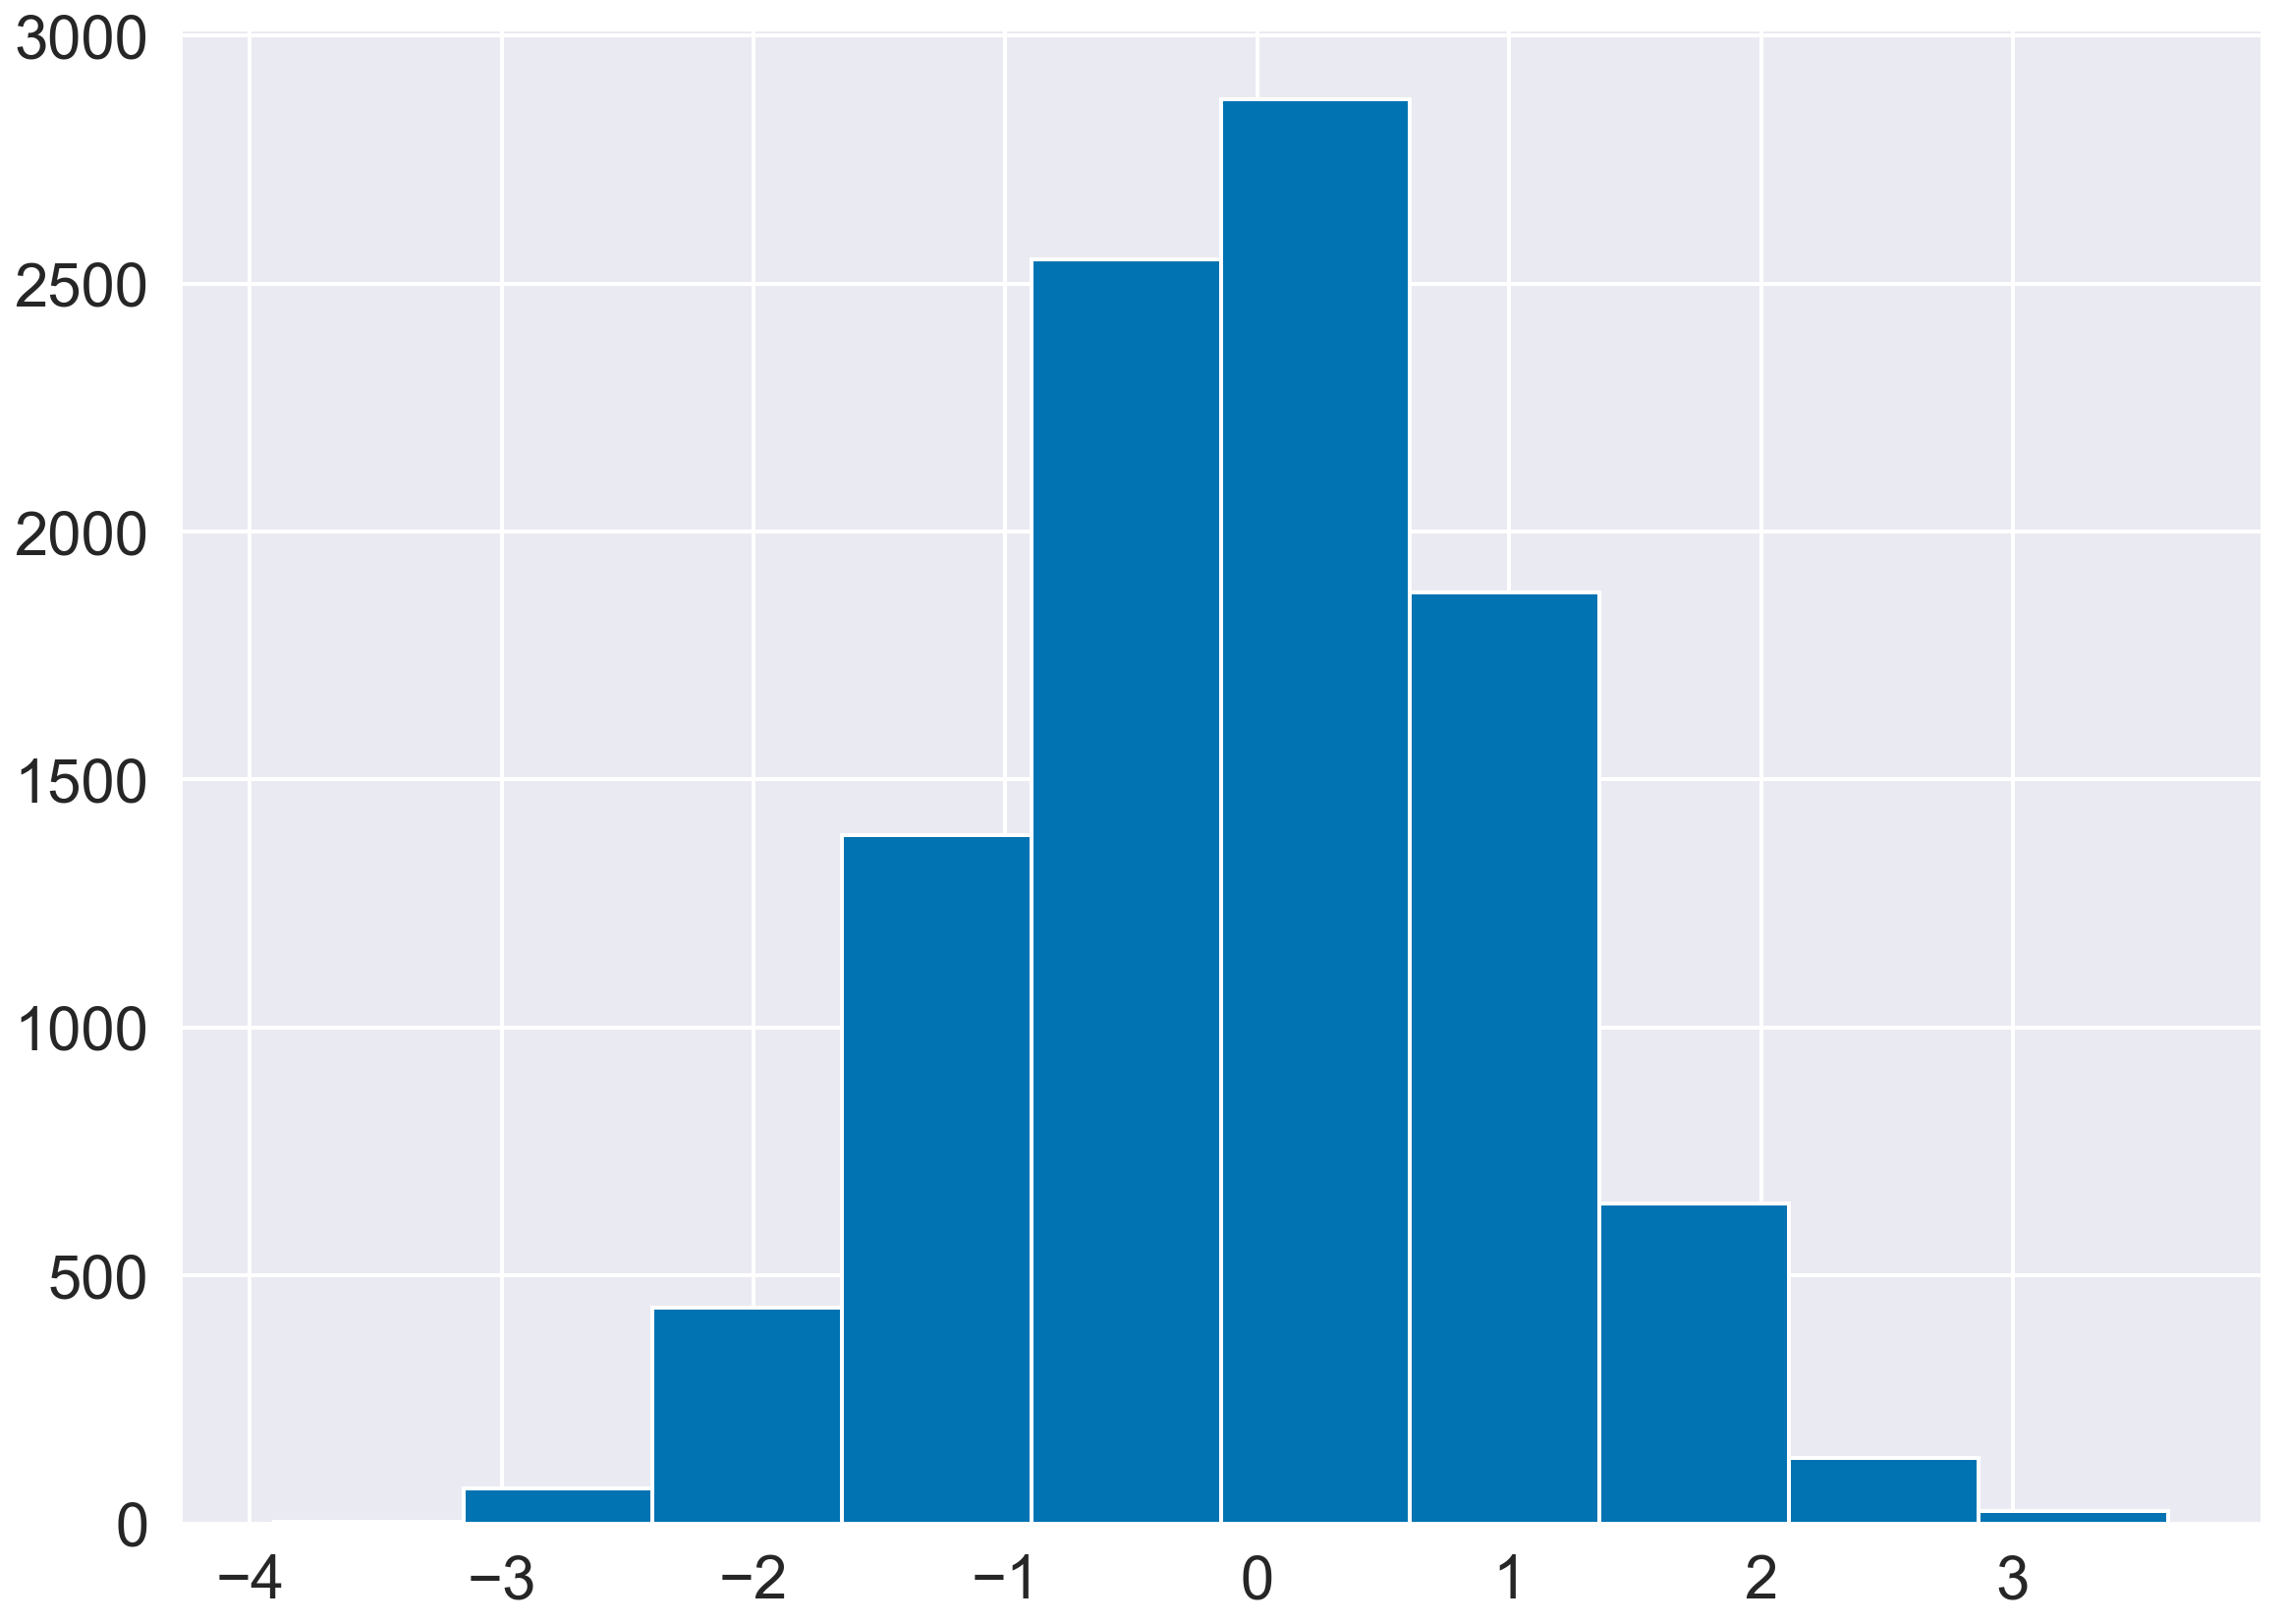

In [46]:
data = np.random.randn(10000)
plt.hist(data)
pass;

The estimator is $$ \hat{p}(x) = \frac{\hat{\theta_j}}{h} $$ where $$ \hat{\theta_j} = \frac{1}{n} \sum_{i=1}^n I(X_i \in B_j ) $$

$$MSE(x) = bias^2(x) + Var(x) = Ch^2 + \frac{C}{nh} $$
minimized by choosing $h = (\frac{C}{n})^{1/3}$, resulting in a risk of:
$$ R = \mathcal{O}(\frac{1}{n})^{2/3}$$

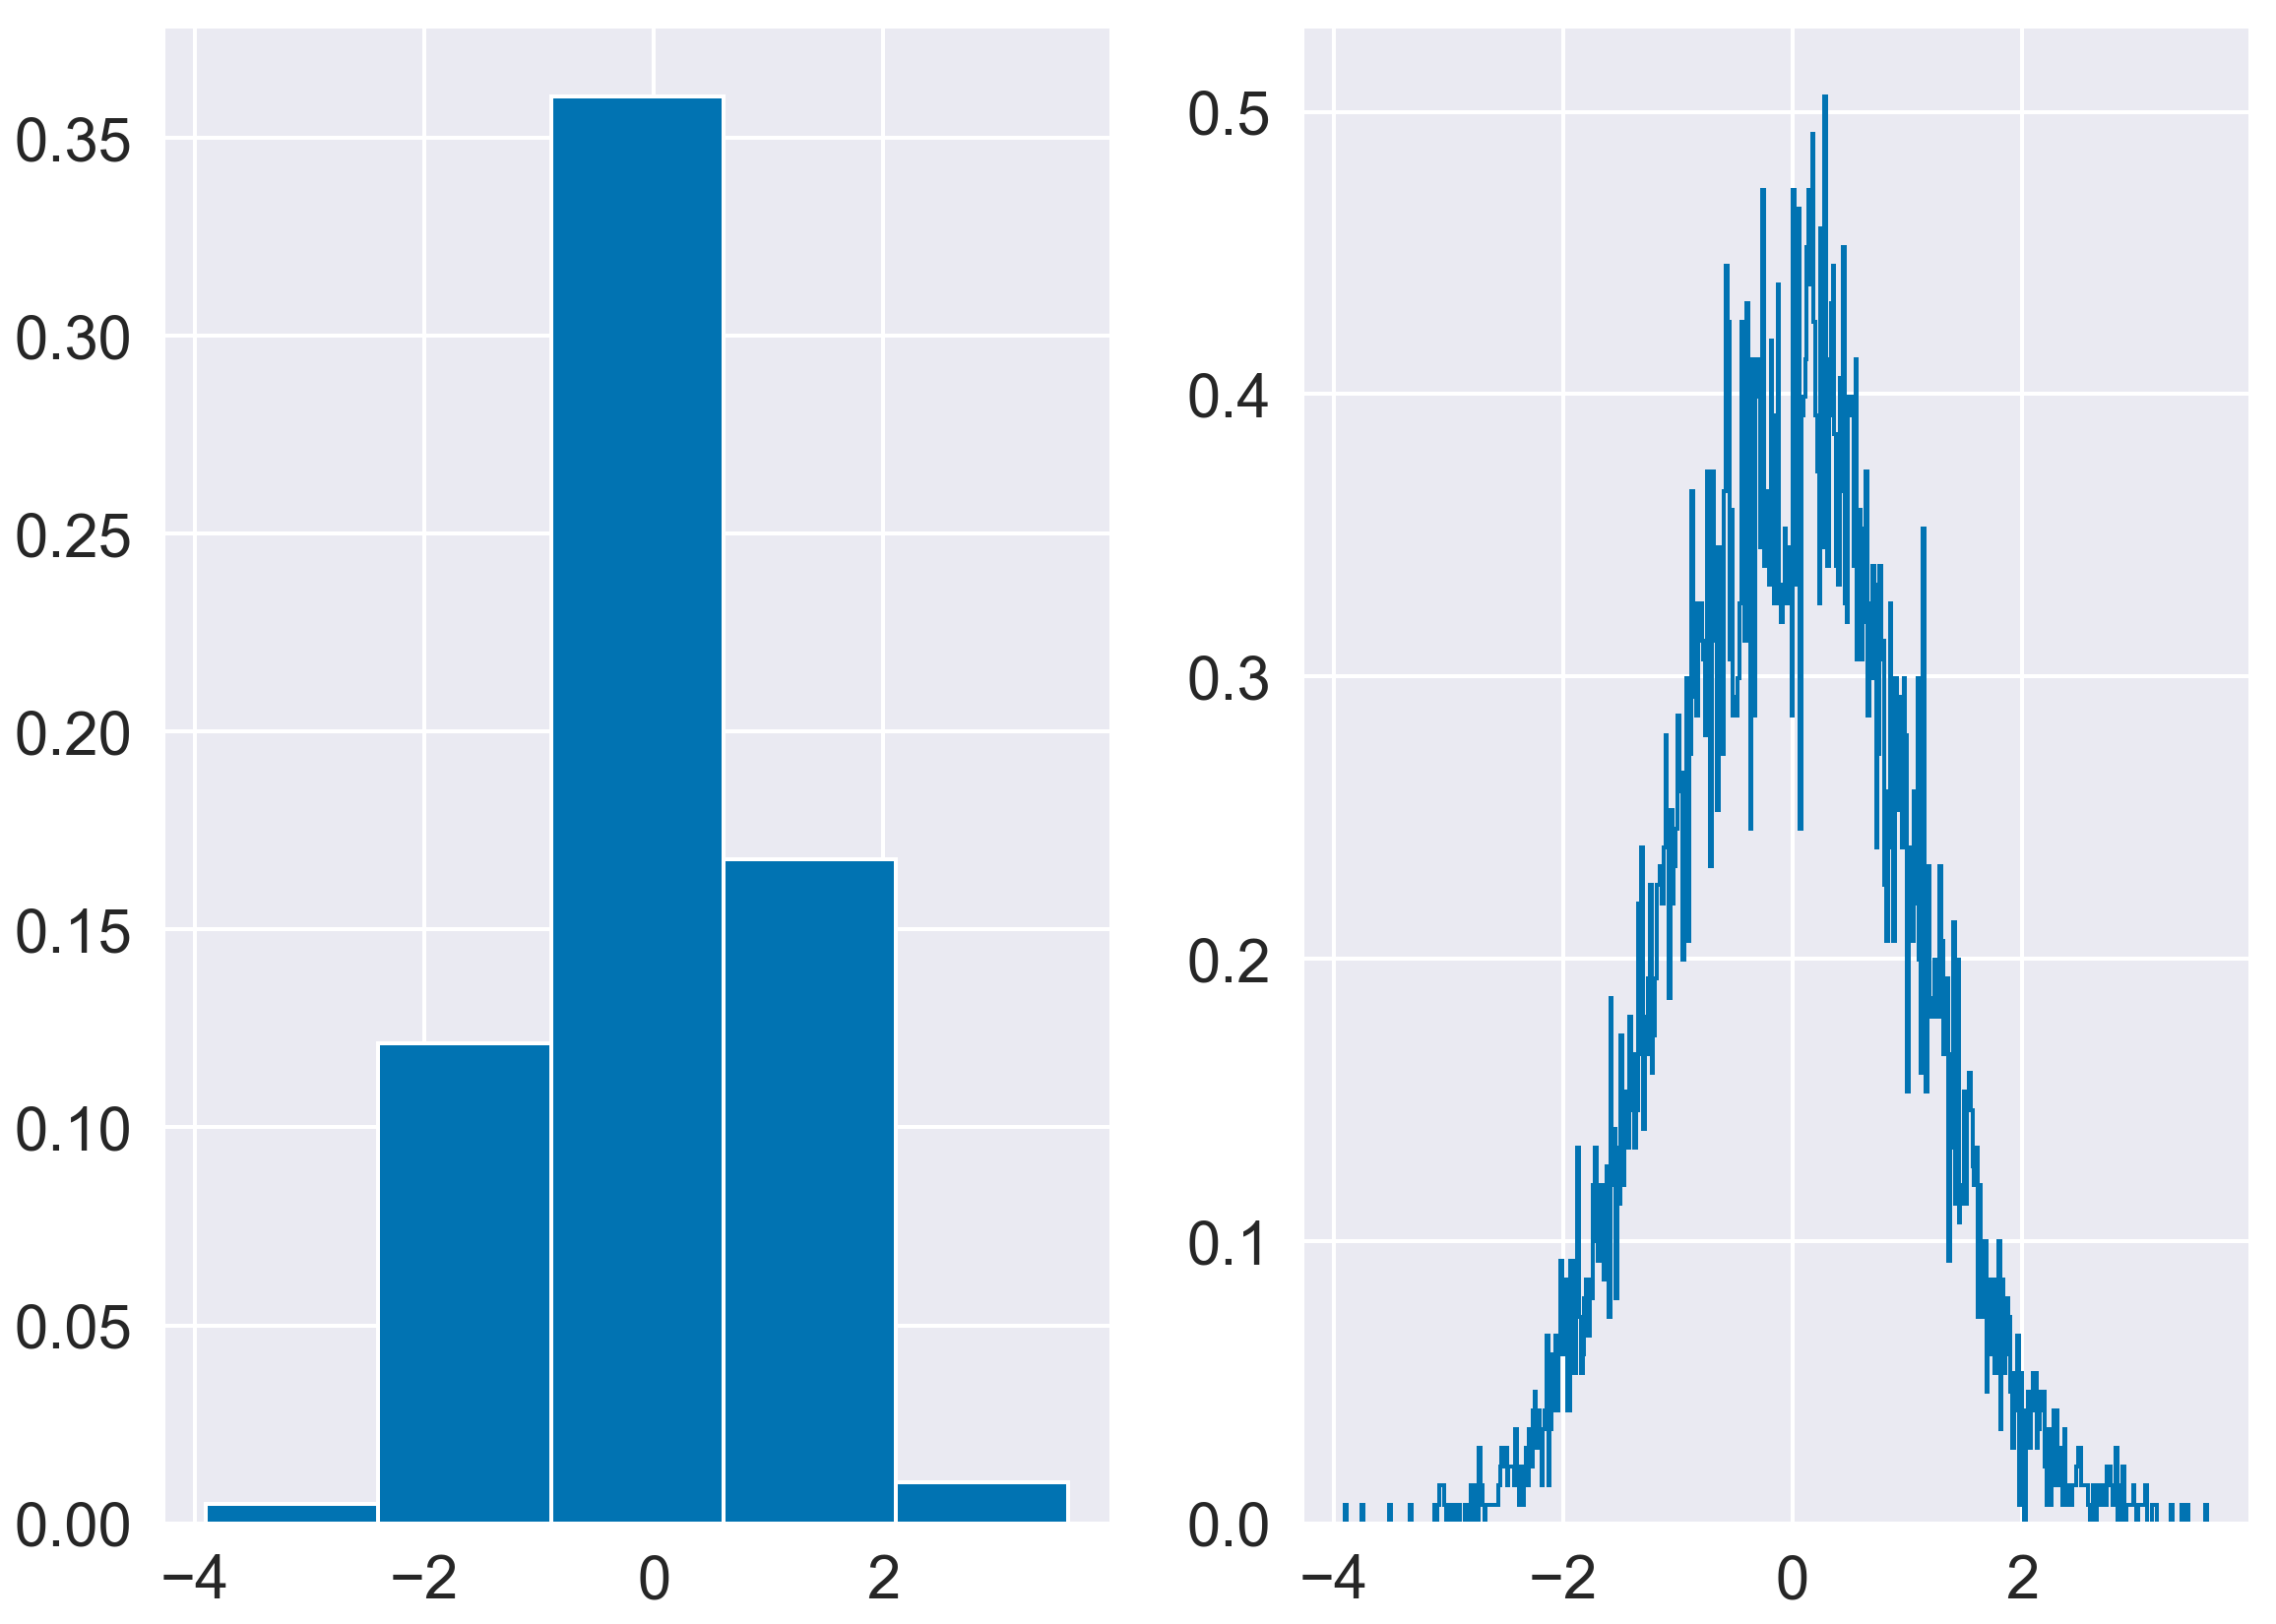

In [69]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data, 5, density=True)
ax2.hist(data, 500, histtype='step', density=True)
pass;

### Can we do better?

### Yes: Kernel Density Estimation

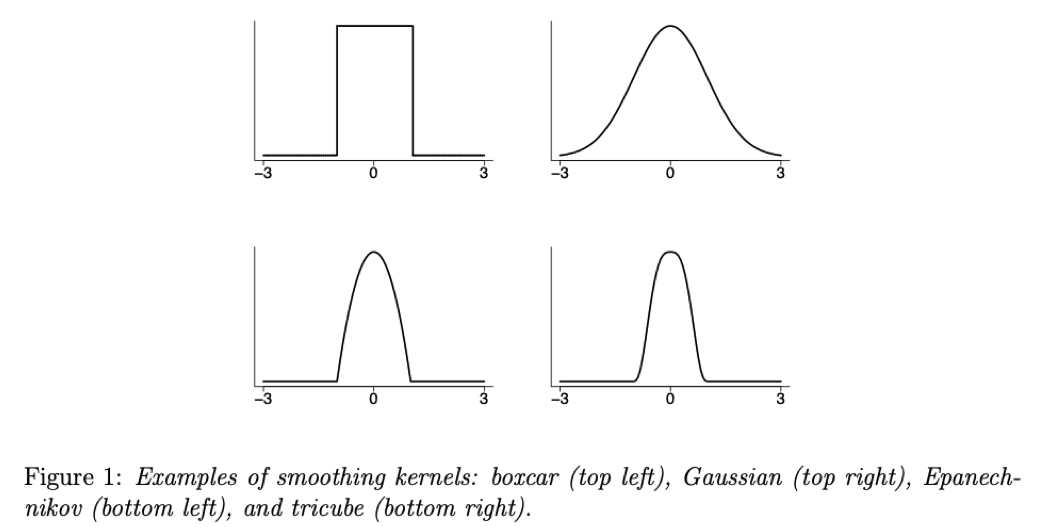

In [64]:
Image(filename='kernels.png') #from Larry Wasserman's All of Statistics book

### Kernels follow the conditions:
$$ K(x) \geq 0, \int K(x) dx = 1, \int x K(x) dx = 0$$

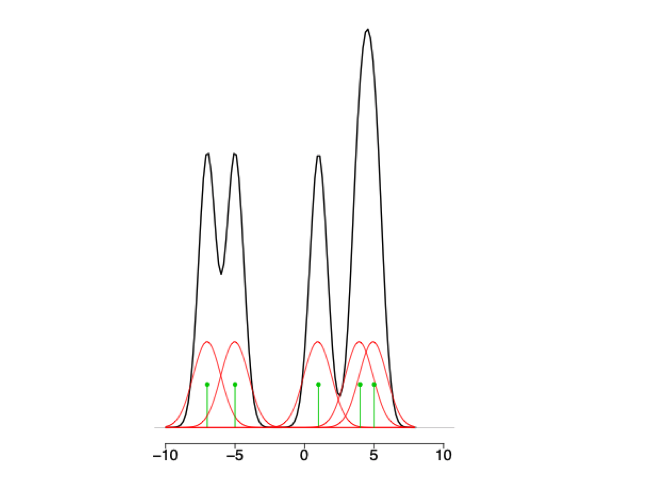

In [67]:
Image('kernel1.png')

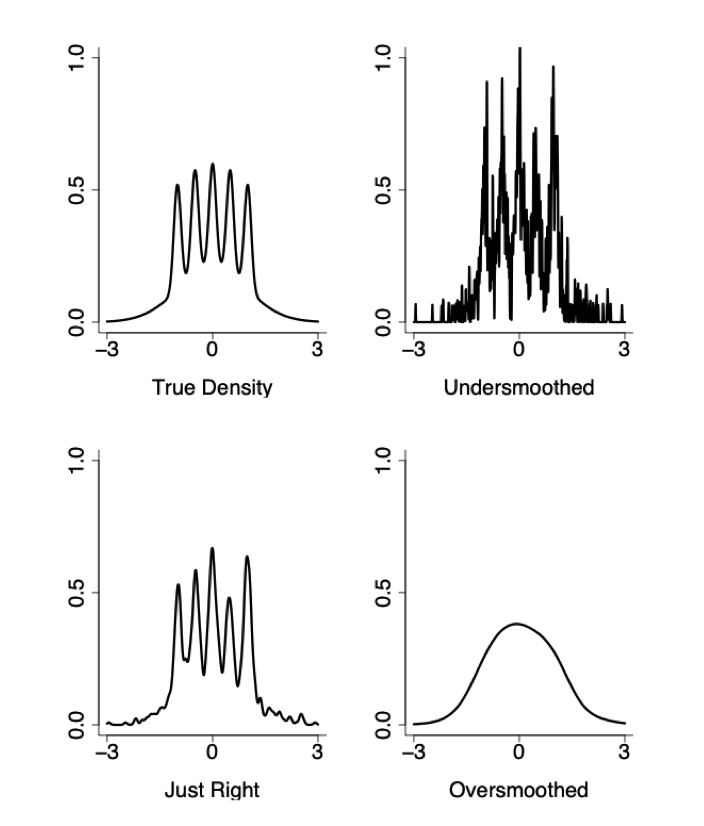

In [66]:
Image('bartsimpson.png')

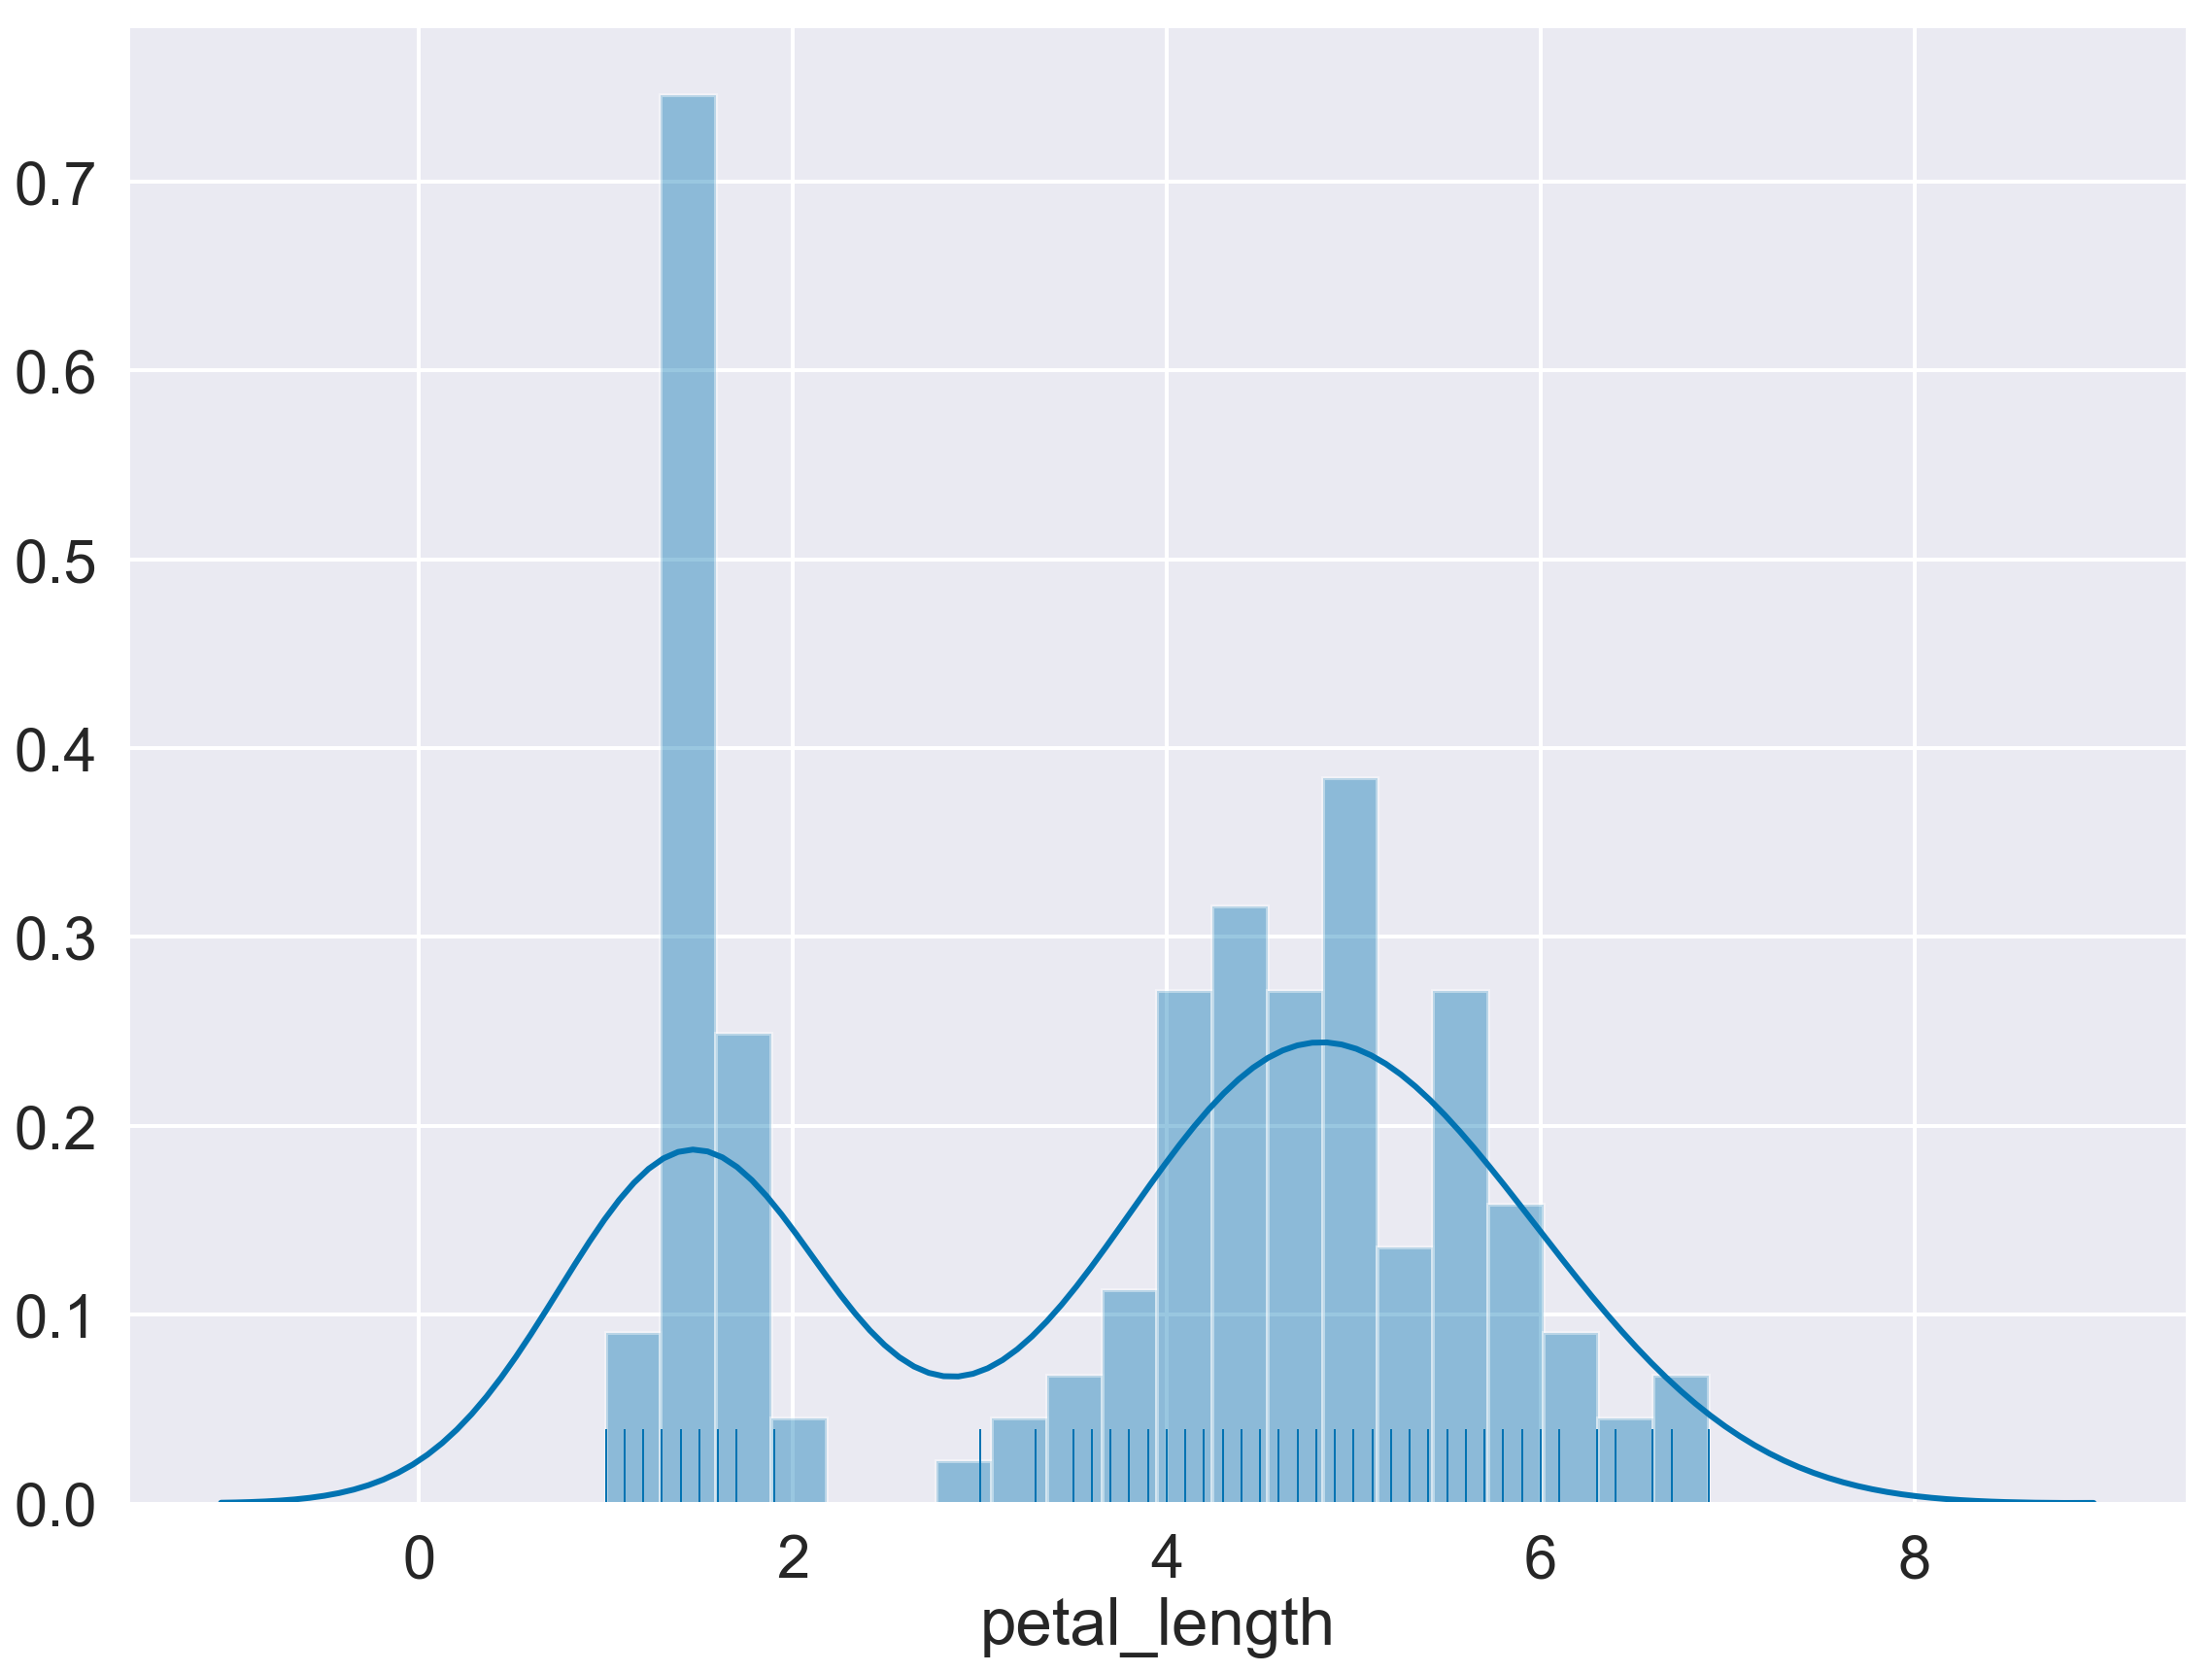

In [39]:
iris = sns.load_dataset('iris')
sns.distplot(iris['petal_length'], bins=20, hist=True, kde=True, rug=True)

some of the examples below are from a talk by Adam Miller (Northwestern U.)

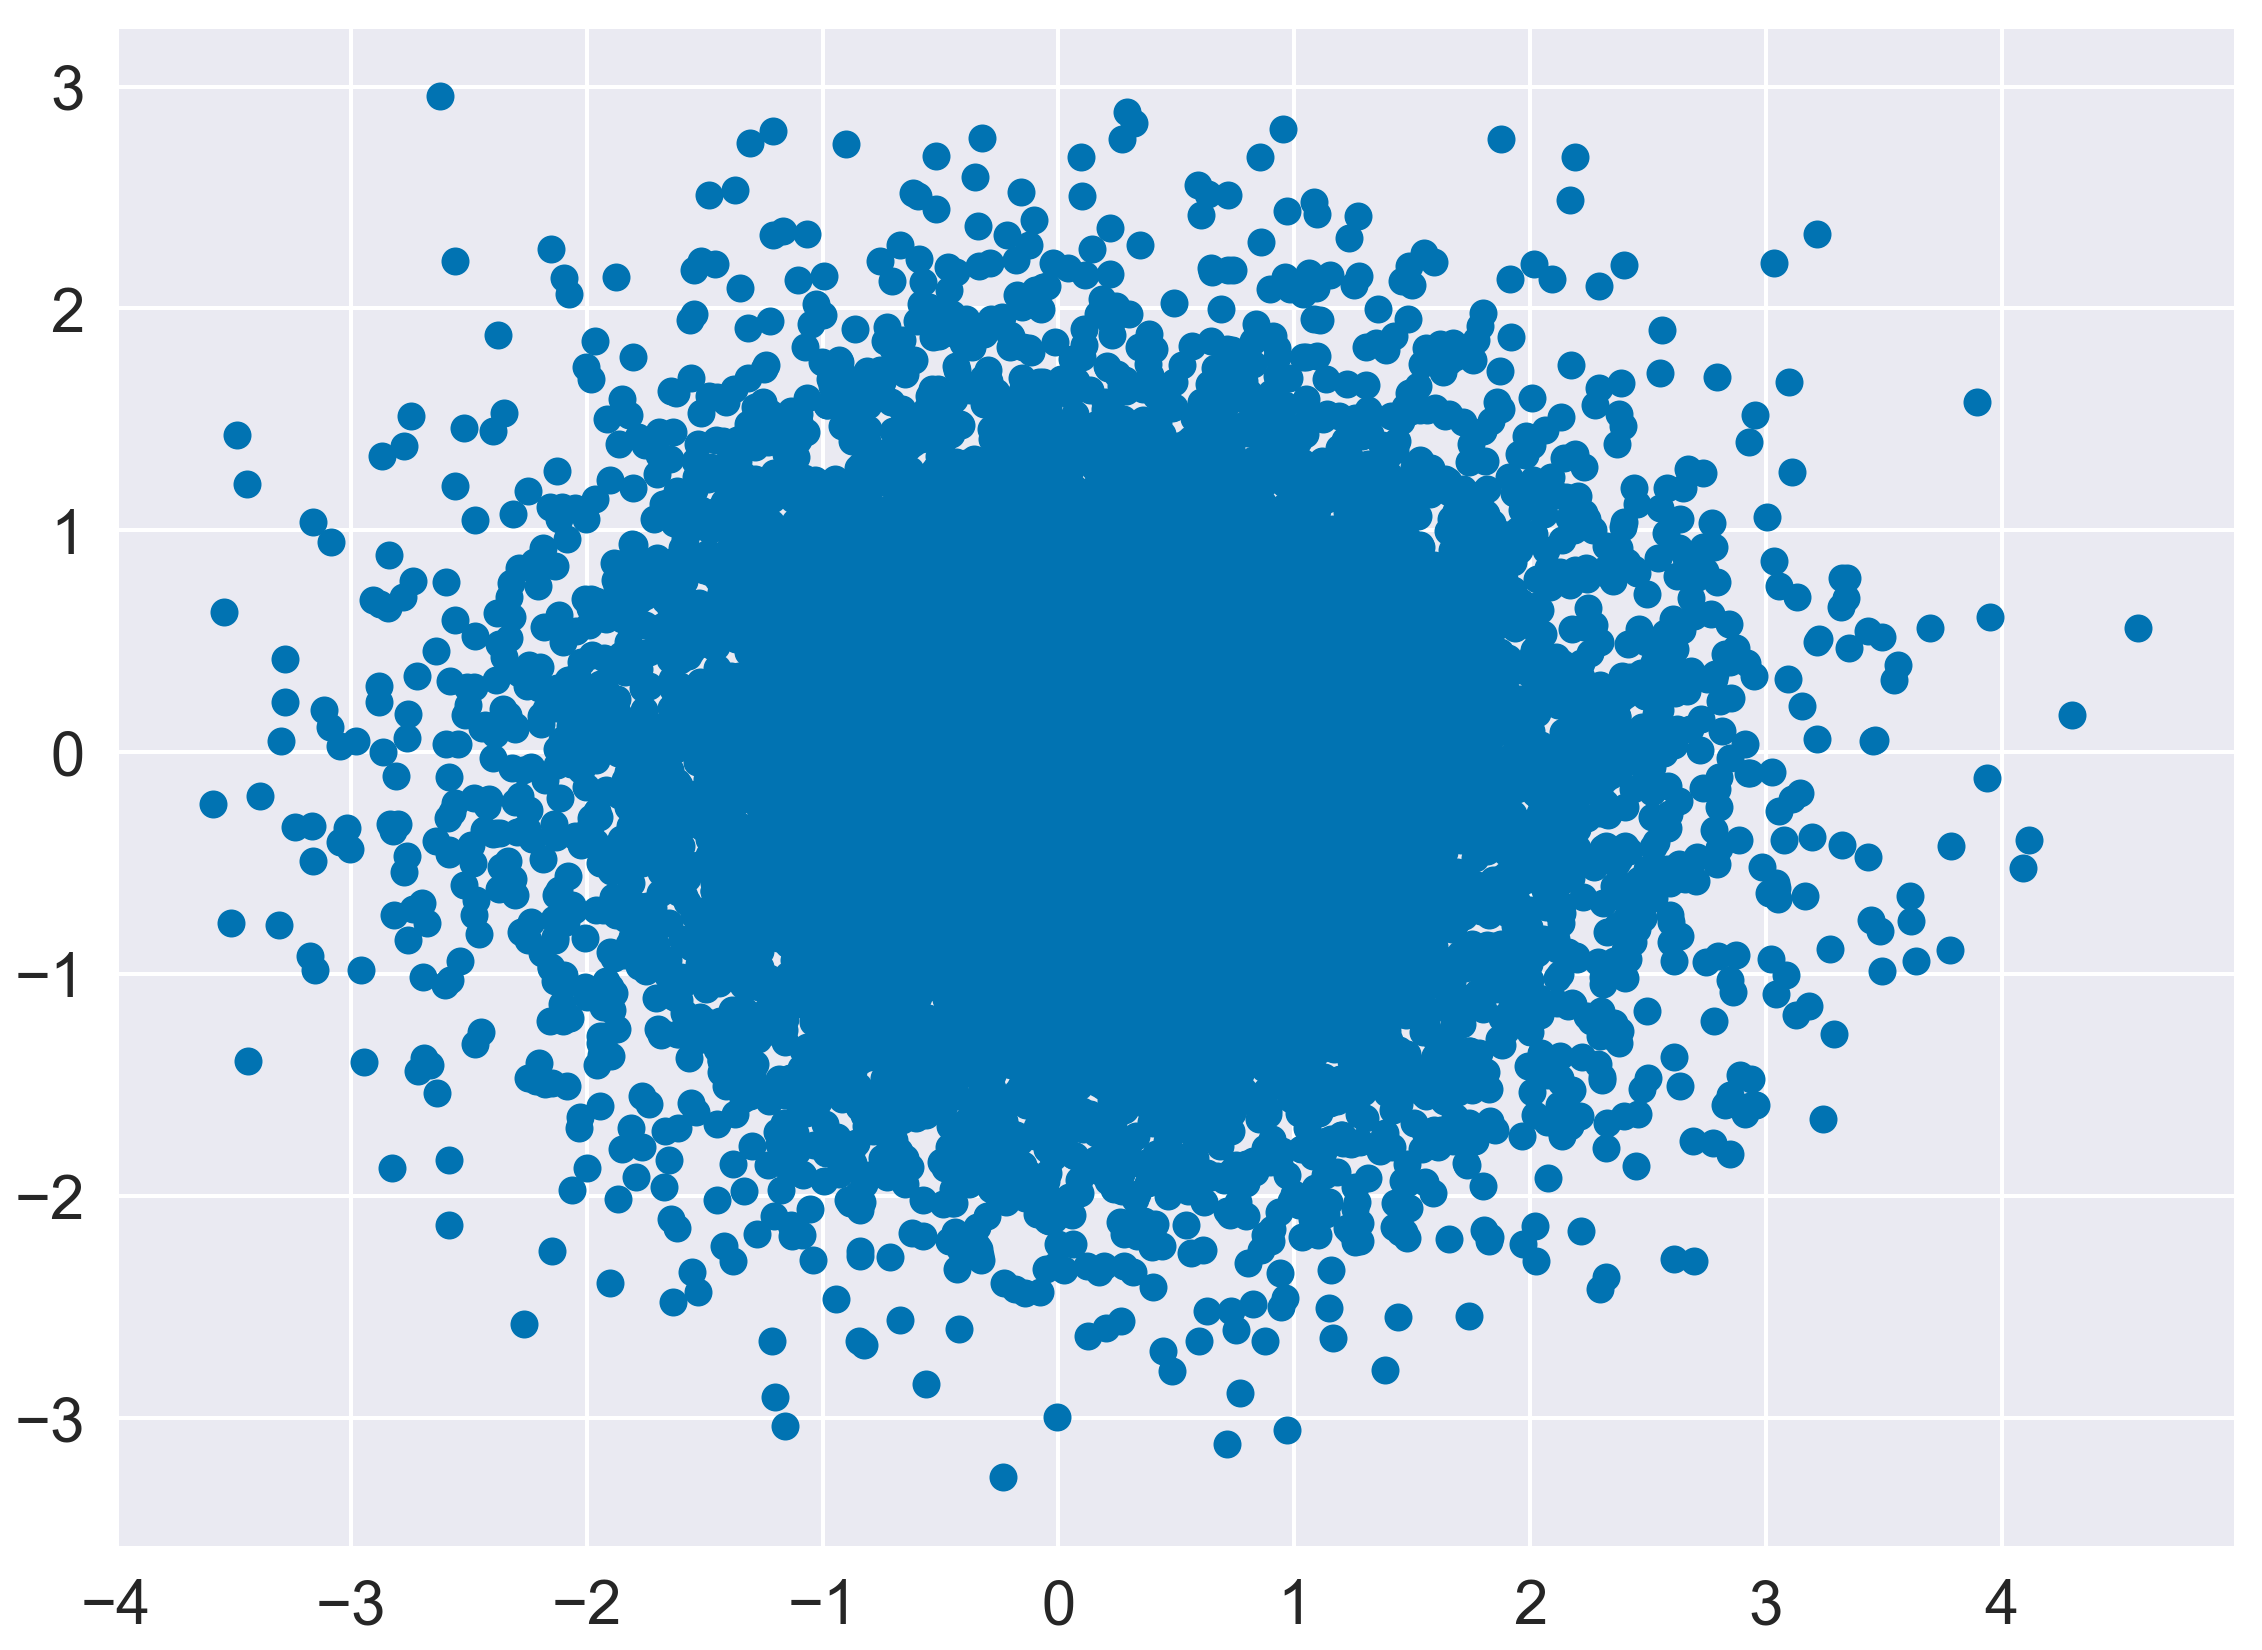

In [27]:
xexample = np.random.normal(loc = 0.2, scale = 1.1, size = 10000)
yexample = np.random.normal(loc = -0.1, scale = 0.9, size = 10000)

plt.scatter(xexample, yexample)

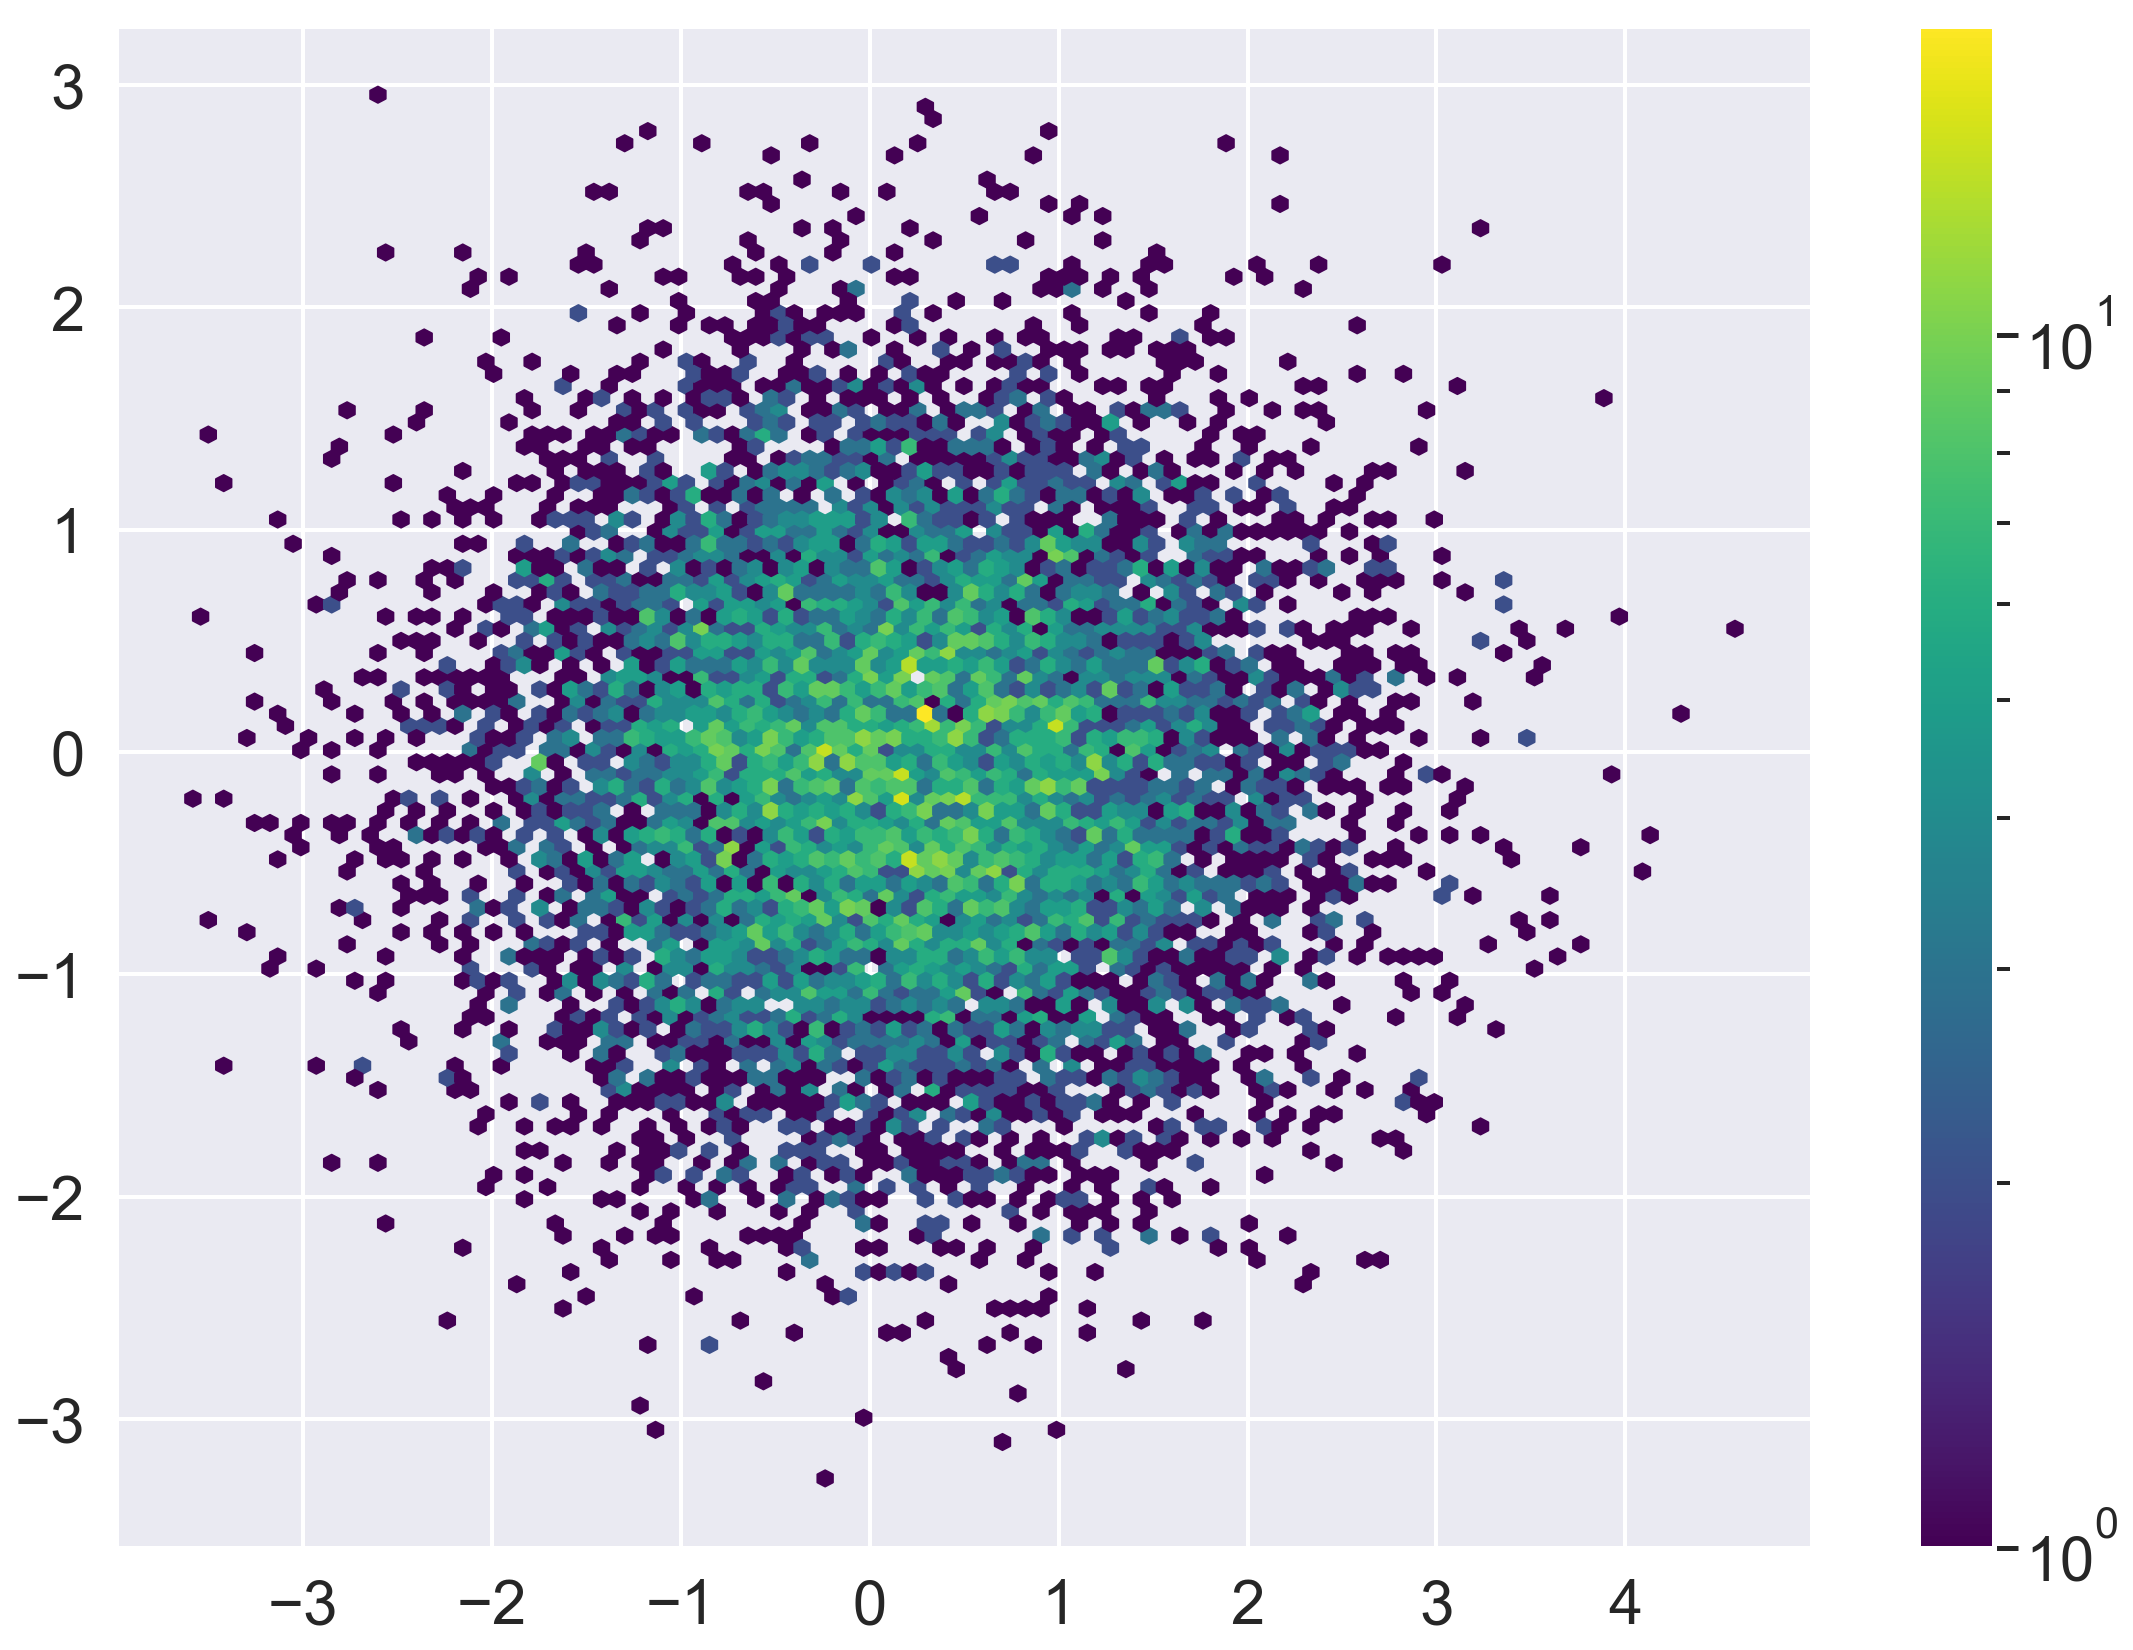

In [28]:
plt.hexbin(xexample, yexample, bins = "log", cmap = "viridis", mincnt = 1)
plt.colorbar()

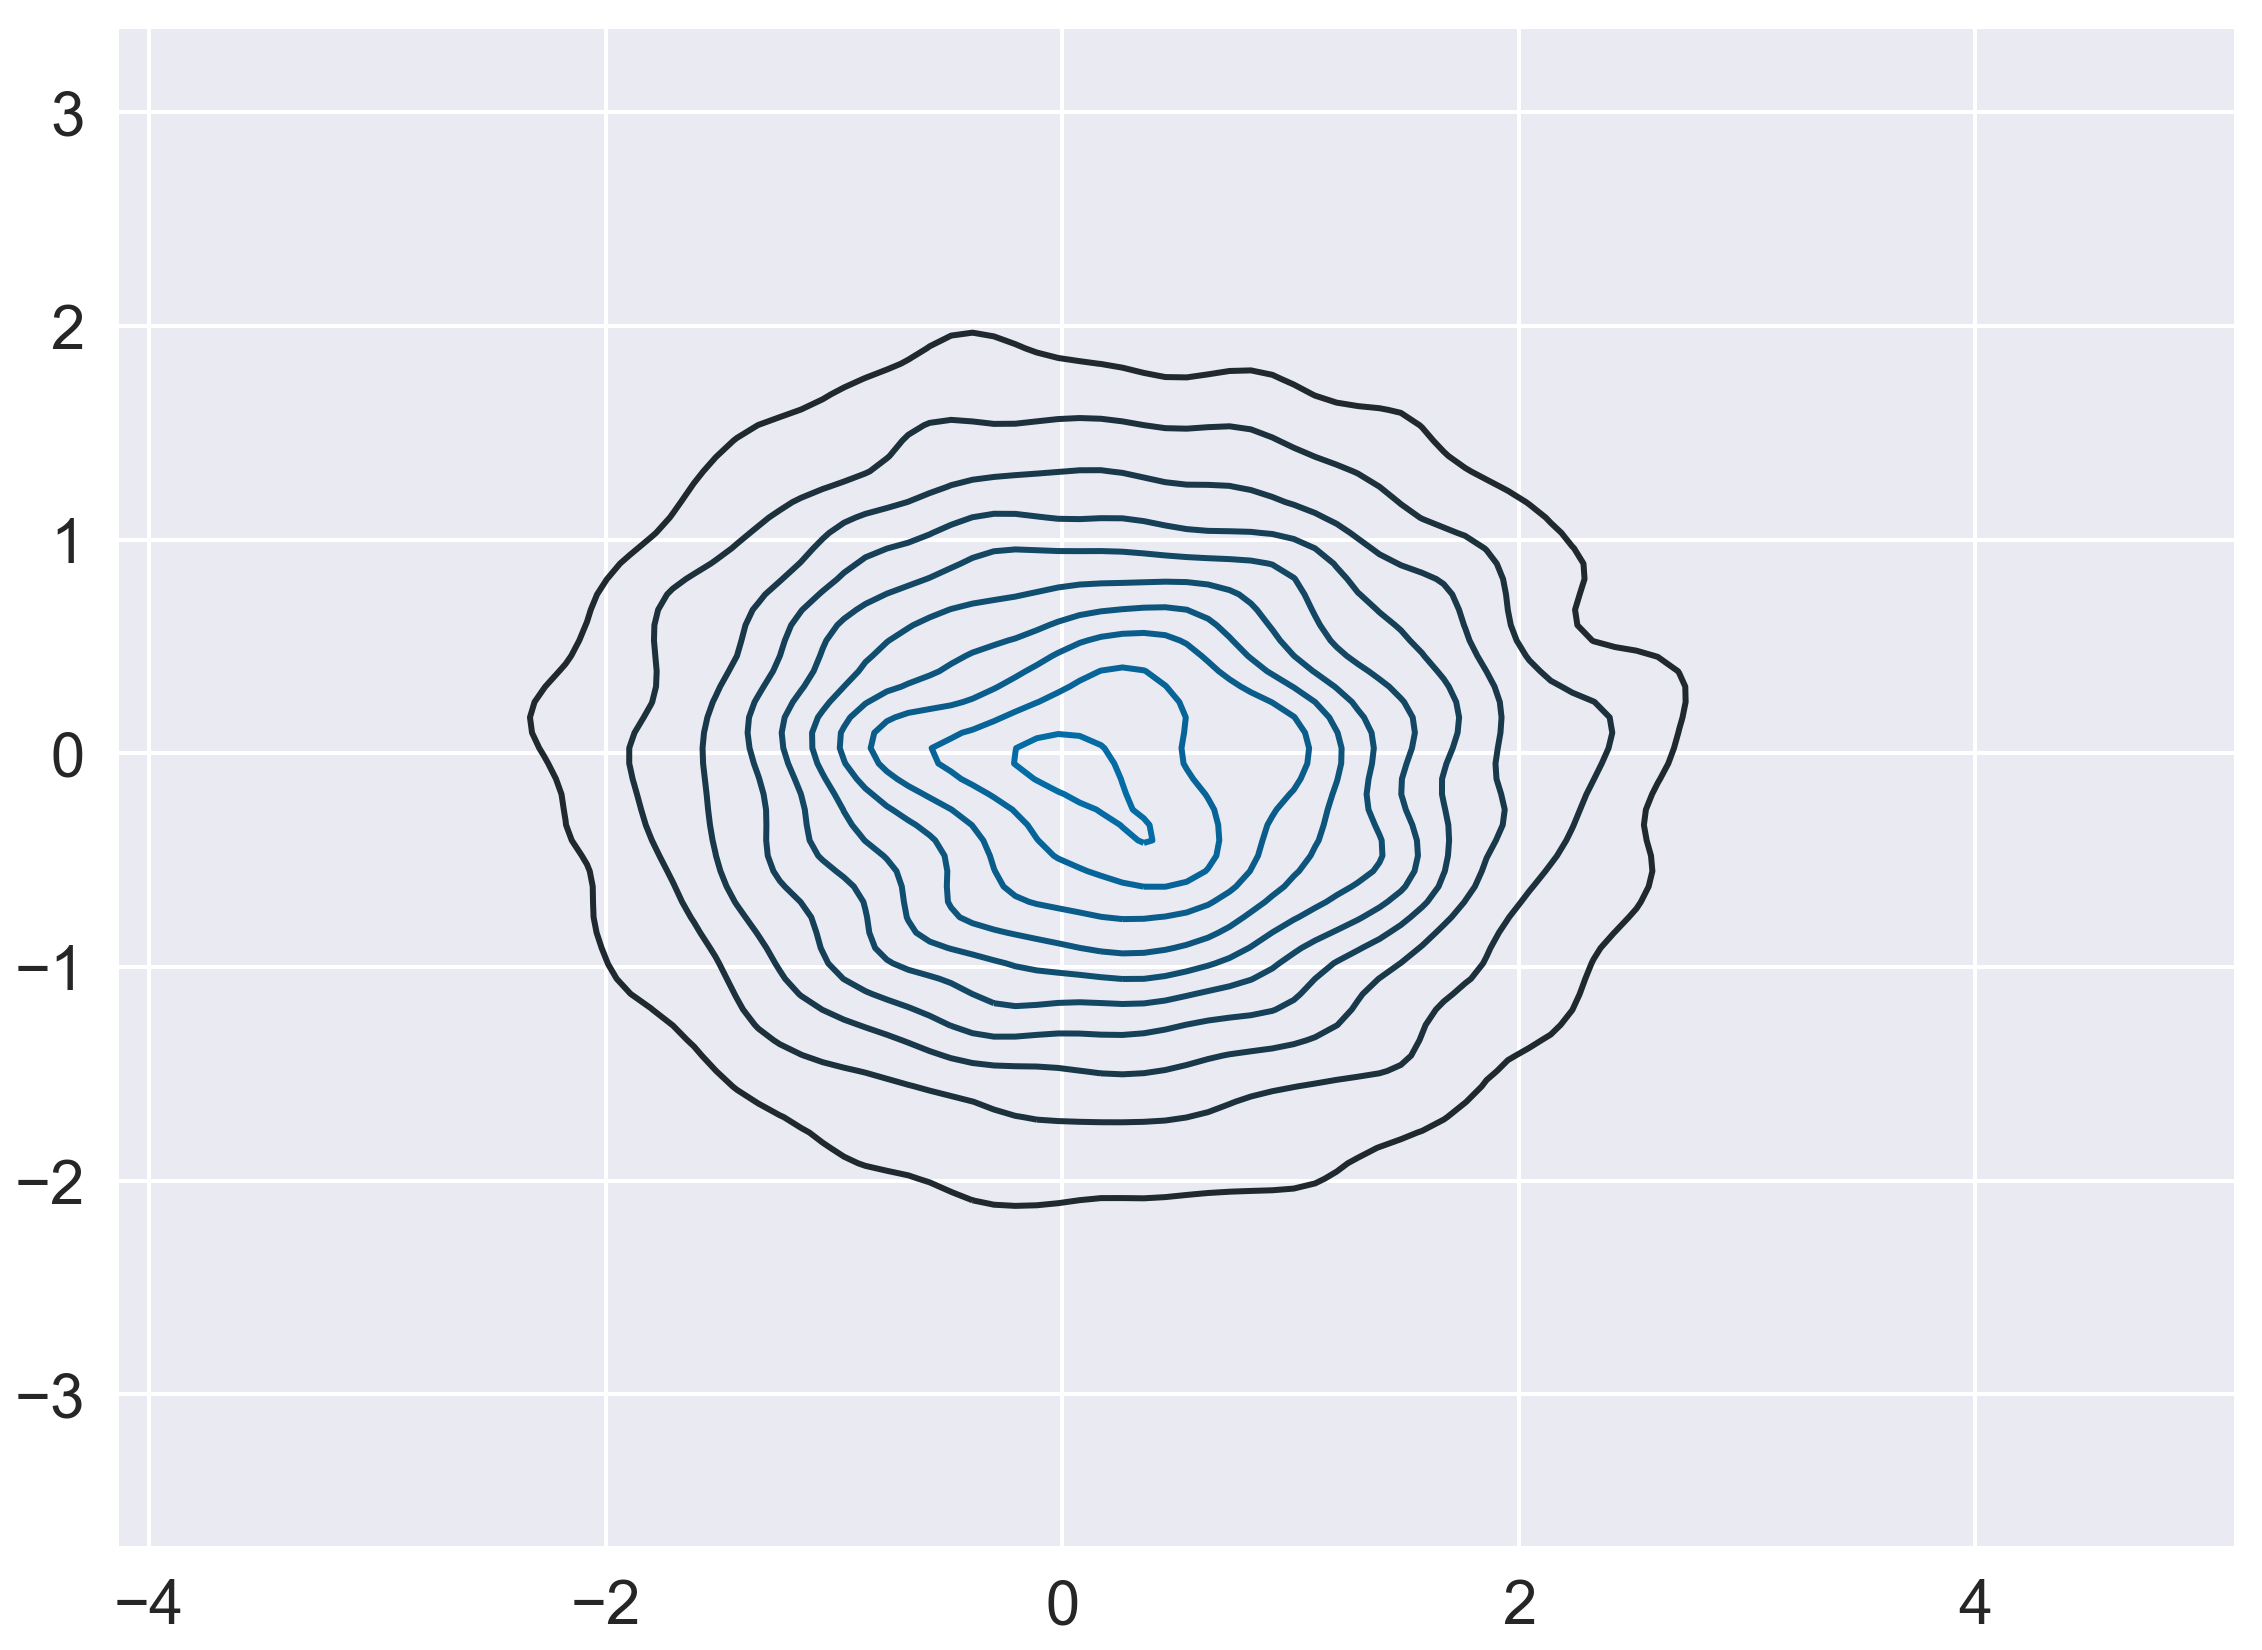

In [32]:
sns.kdeplot(xexample, yexample)

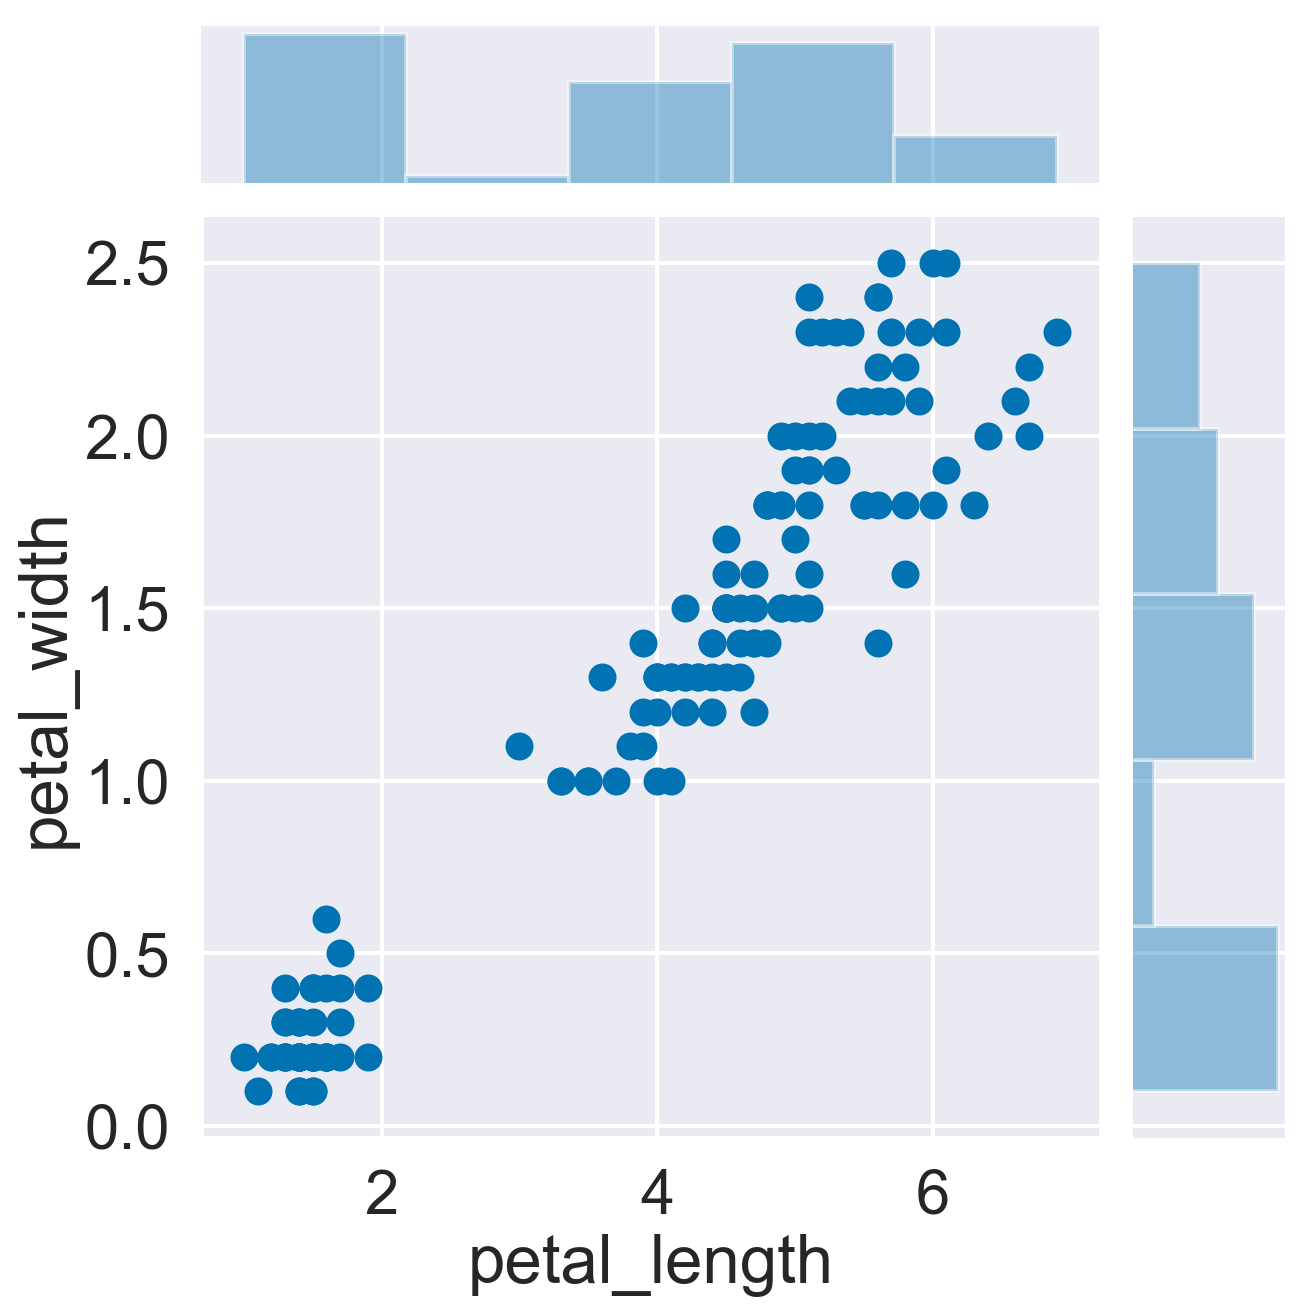

In [36]:
iris = sns.load_dataset("iris")
sns.jointplot(x=iris['petal_length'], y=iris['petal_width'], height=10)

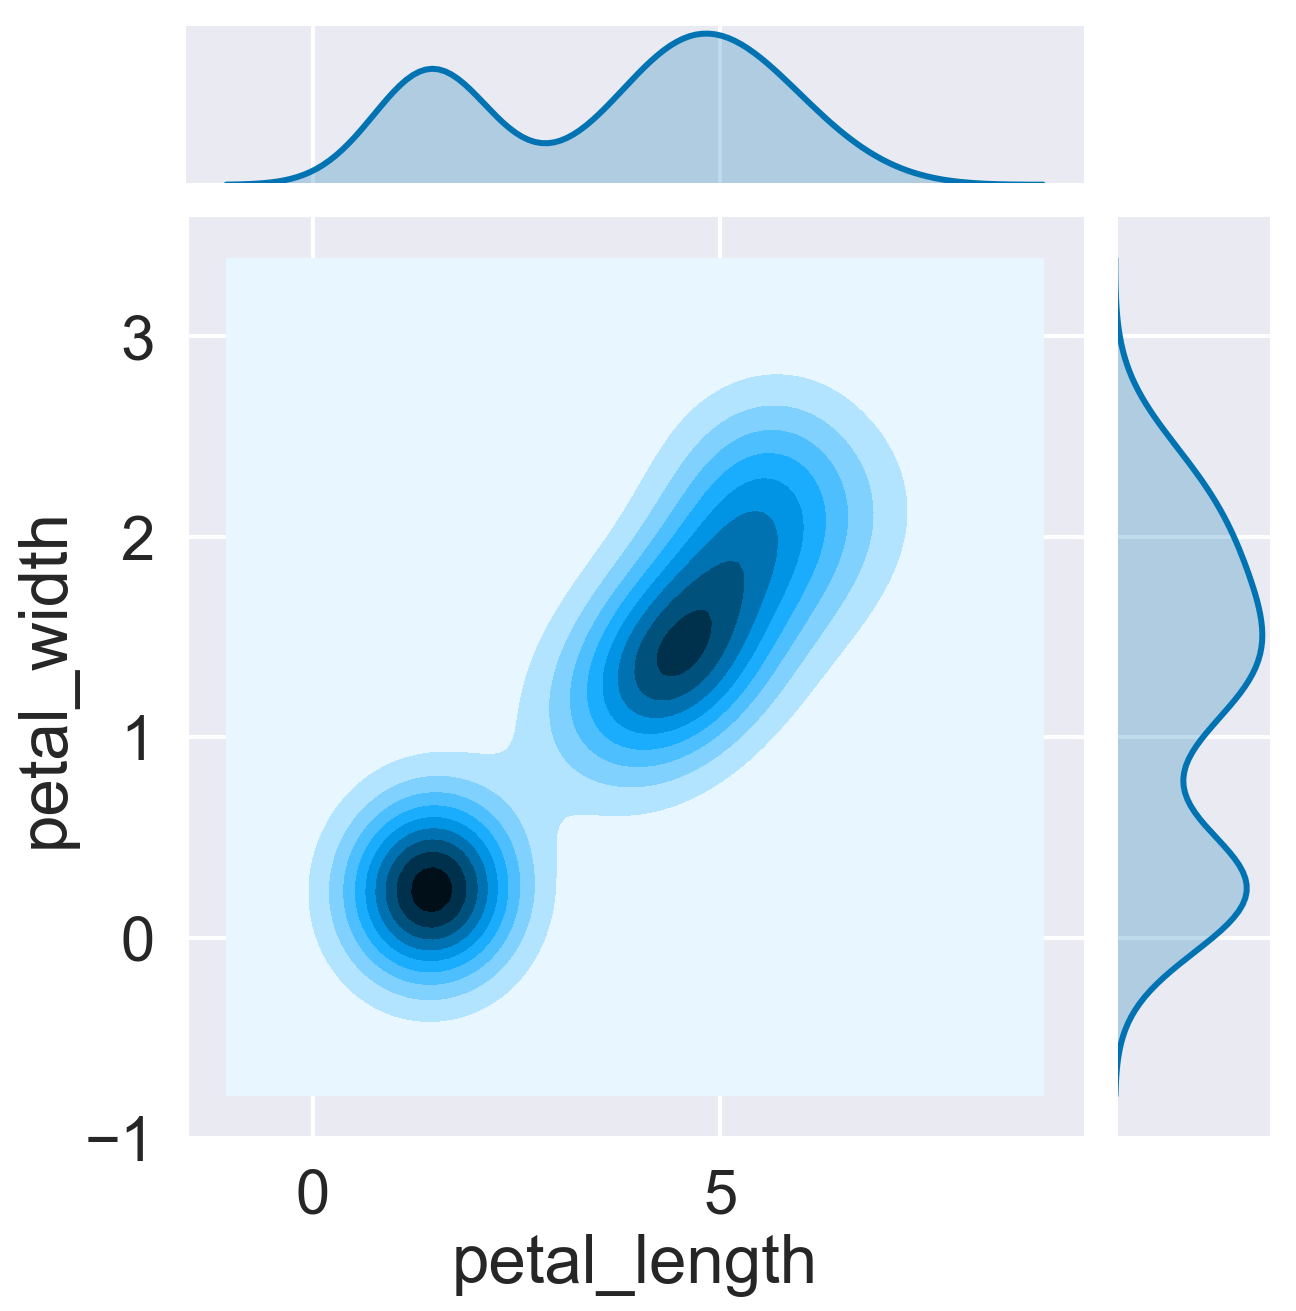

In [38]:
sns.jointplot(x=iris['petal_length'], y=iris['petal_width'], kind = 'kde', shade = 'False', height=10)

Is KDE better than a simple histogram?
$$MSE(x) = bias^2(x) + Var(x) = C_1h^4 + \frac{C_2}{nh}$$
minimized by choosing $ h = (\frac{C_1}{4nC_2})^{1/5} $, giving a risk of:
$$ R_{KDE} = \mathcal{O}(\frac{1}{n})^{4/5} < R_{histogram}$$
(note this is in 1-D, in d-Dimensions, the optimal $R = \mathcal{O}(1/n)^{4/4+d}$, this is the statistical curse of dimensionality)

Can we do **even** better?

No! (minimax theory: KDE achieves the optimal rate of convergence)

## Communication

In [21]:
files = !ls *.png

### Ways to make a data point salient

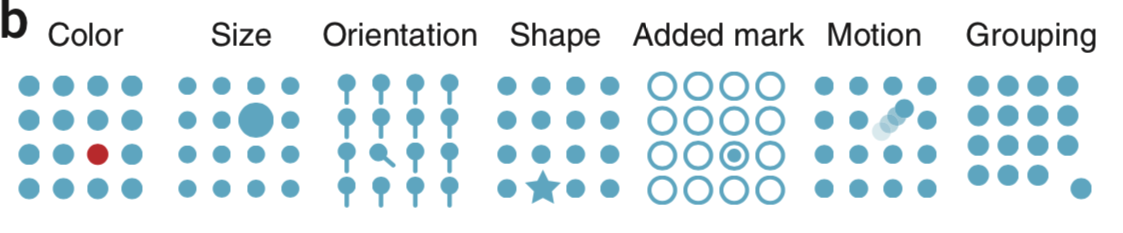

In [68]:
from IPython.display import Image
Image(filename=files[0]) # most of the next figures are from Nature's "Point of View" columns (Wong & Krzywinski+)

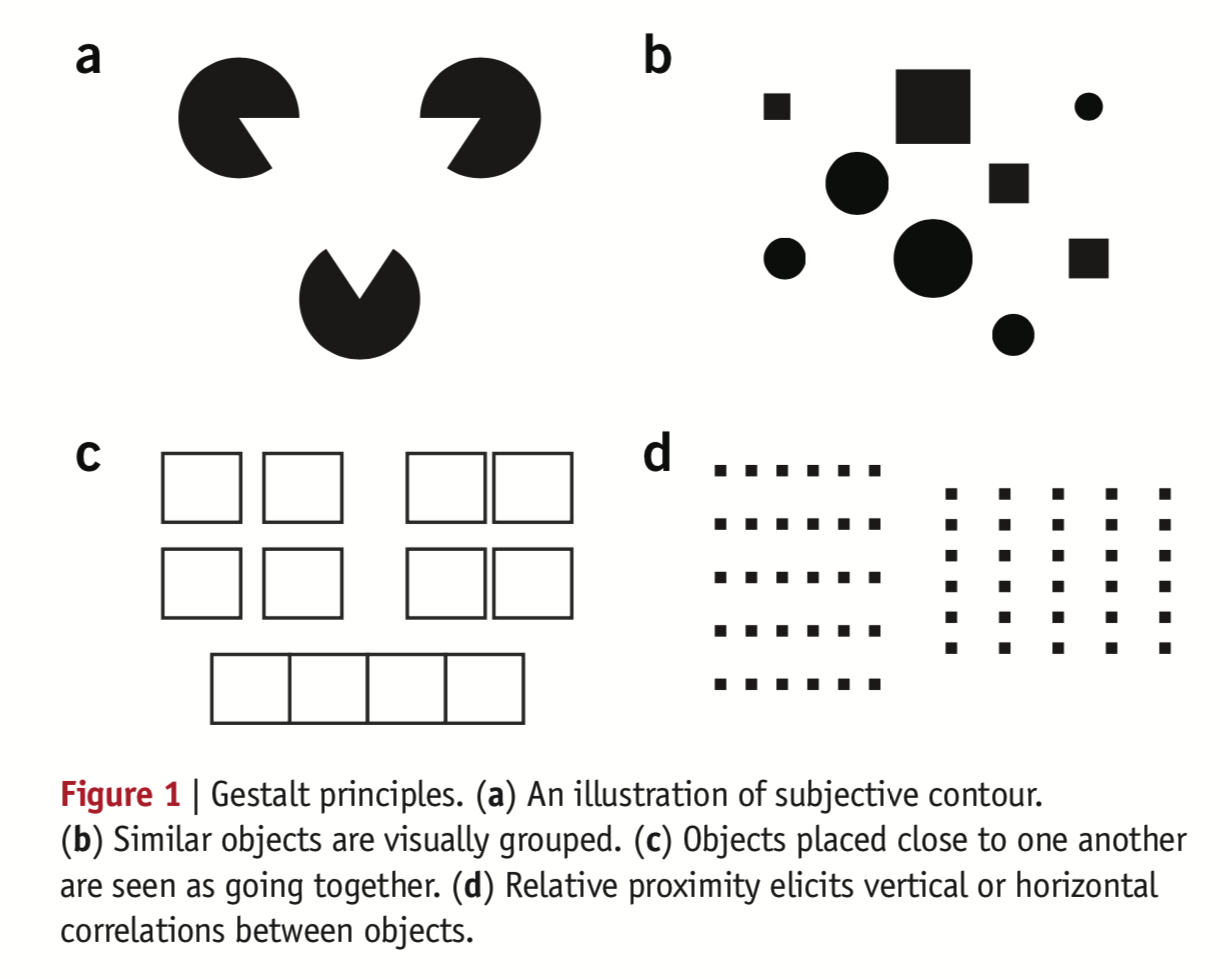

In [12]:
Image(filename=files[2]) 

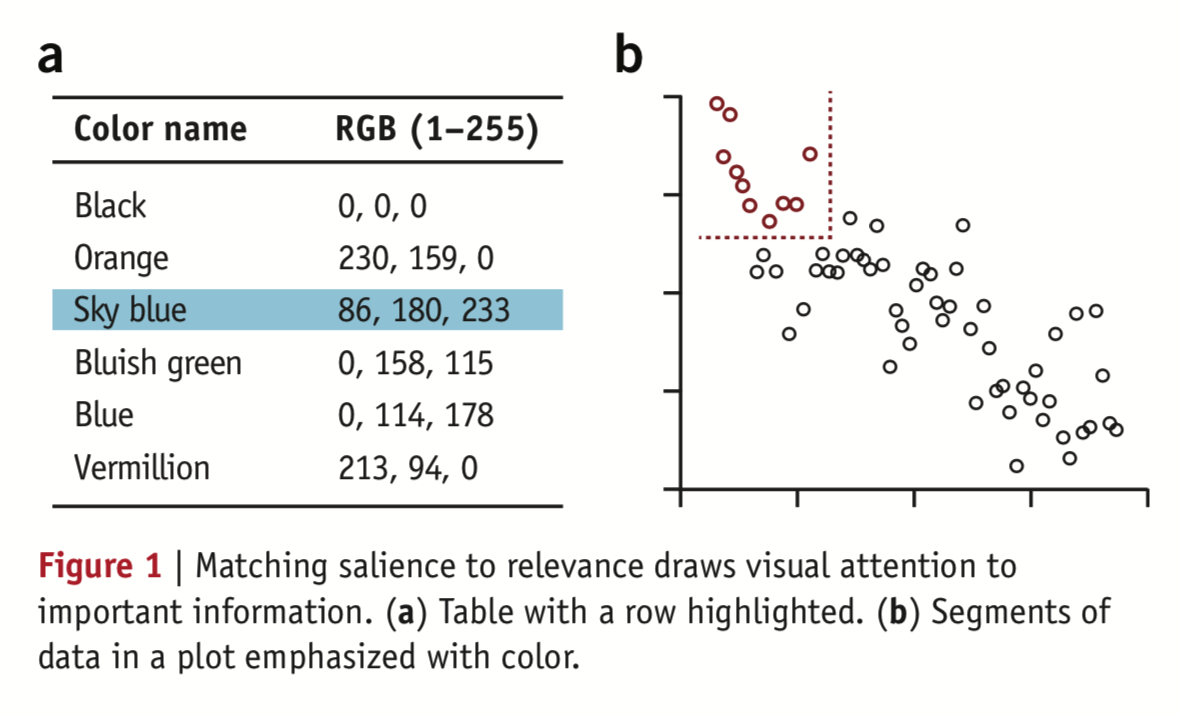

In [15]:
Image(filename=files[5]) 

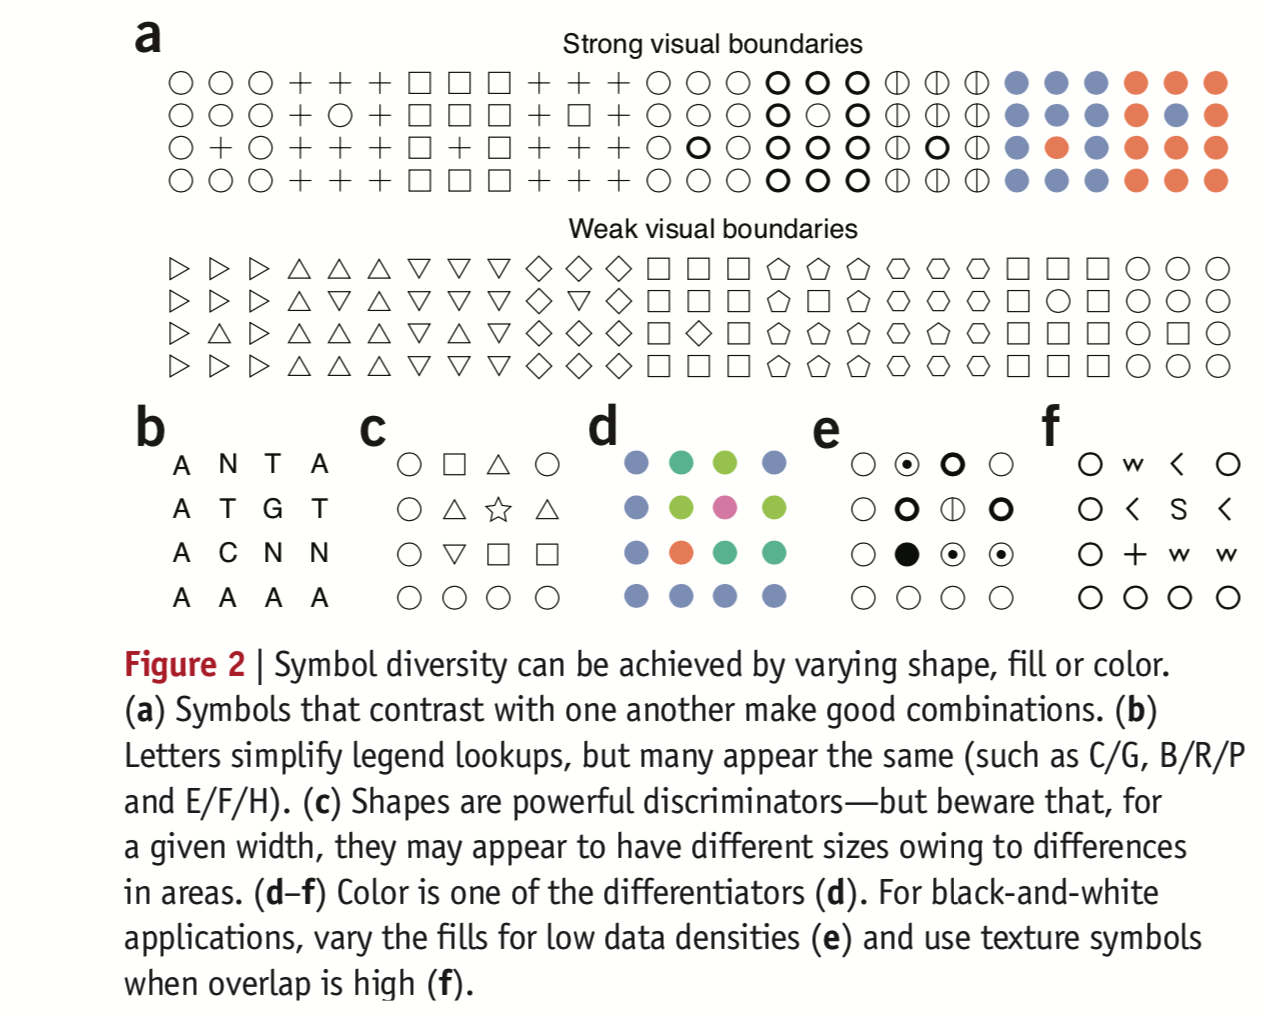

In [18]:
Image(filename=files[8]) 

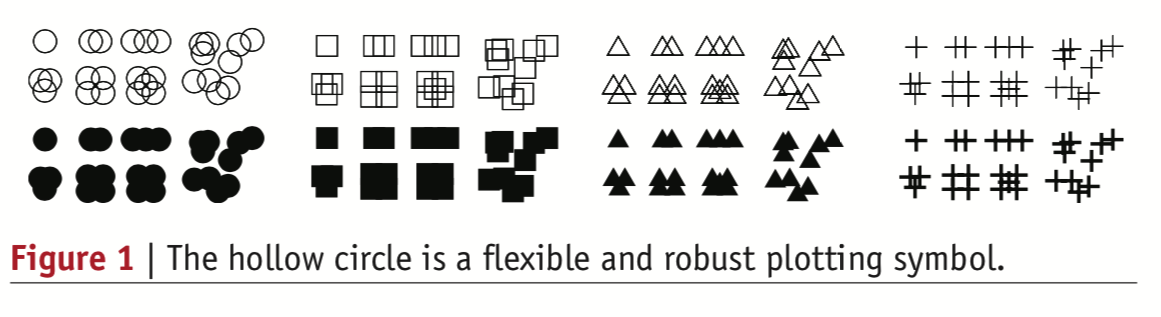

In [17]:
Image(filename=files[7]) 

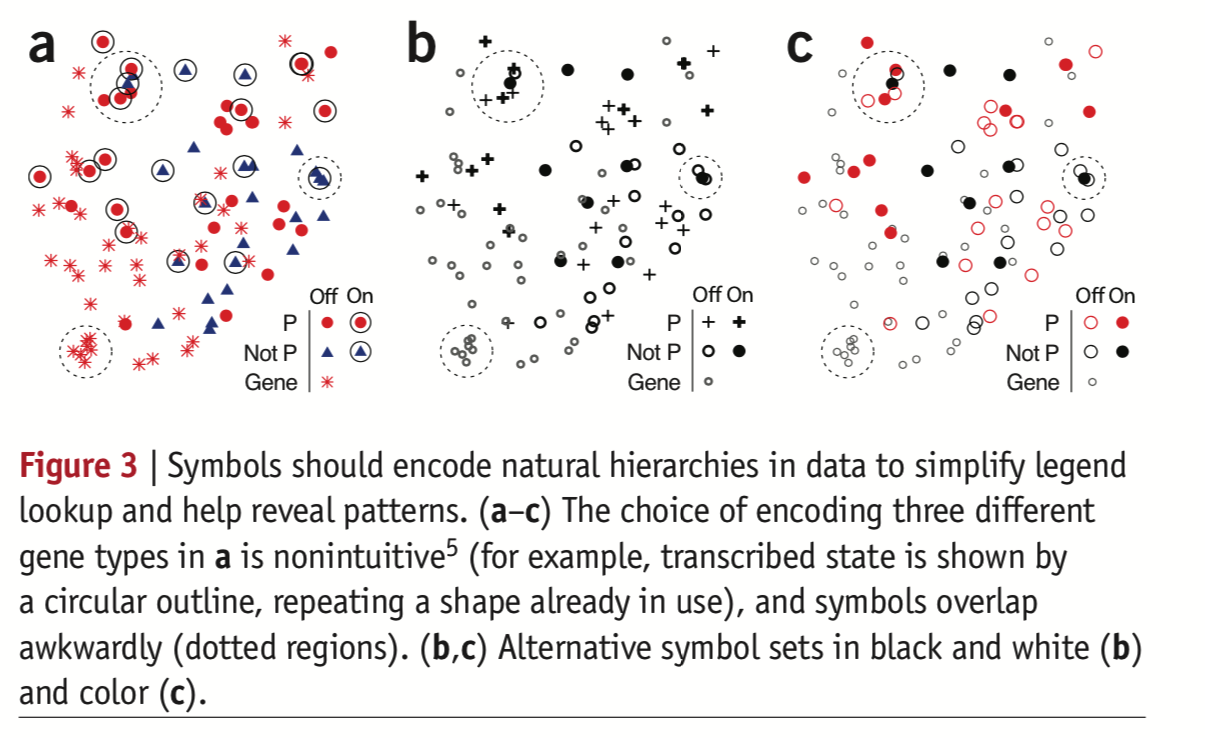

In [16]:
Image(filename=files[6]) 

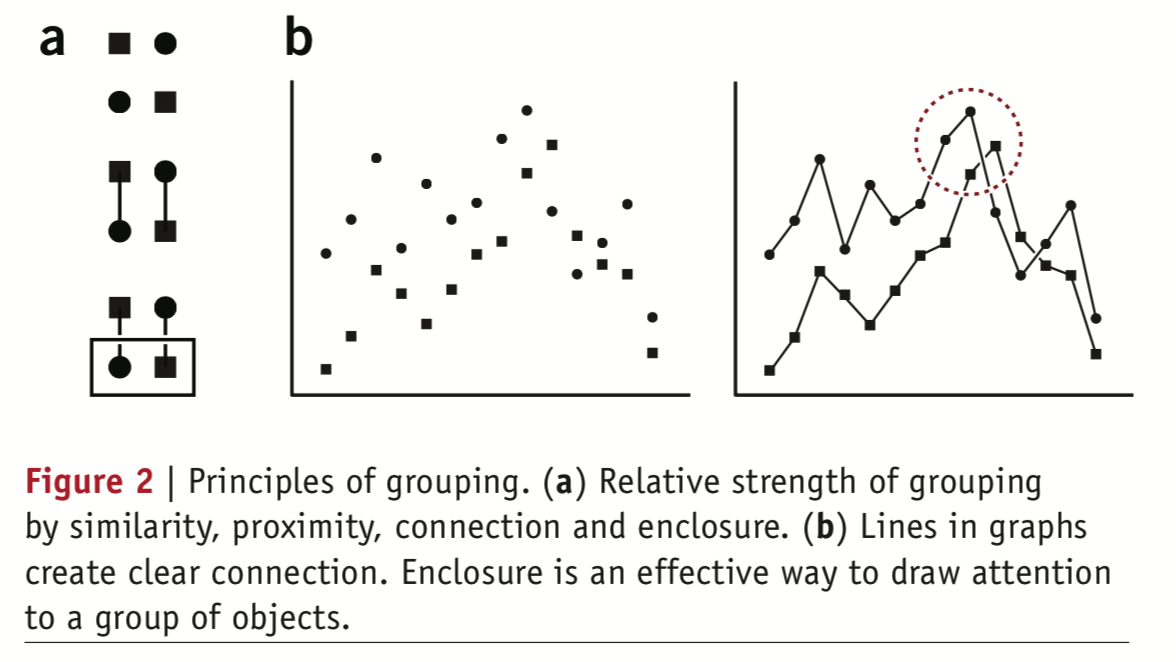

In [11]:
Image(filename=files[1]) 

### Beware of colorscales

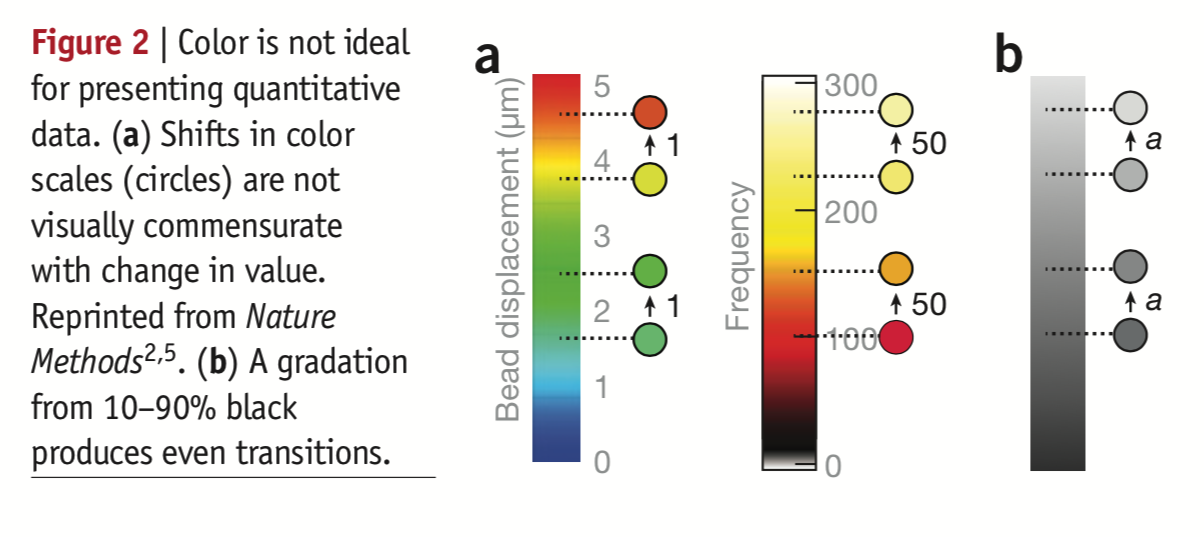

In [13]:
Image(filename=files[3]) 

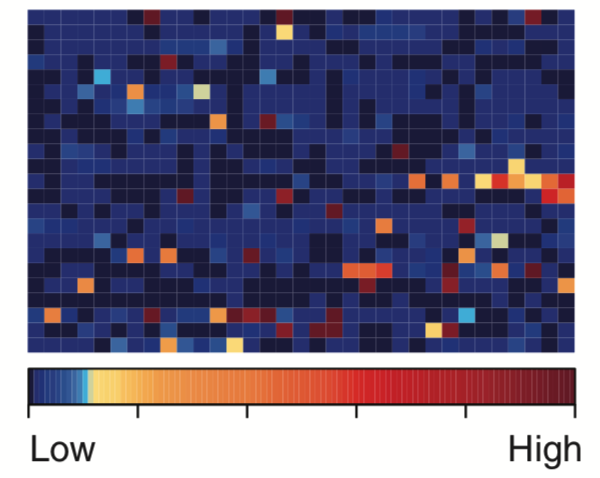

In [14]:
Image(filename=files[4]) 

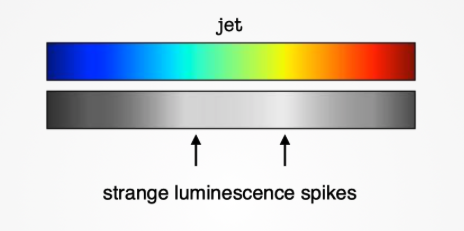

In [19]:
Image(filename=files[9]) 

### So what should I use?

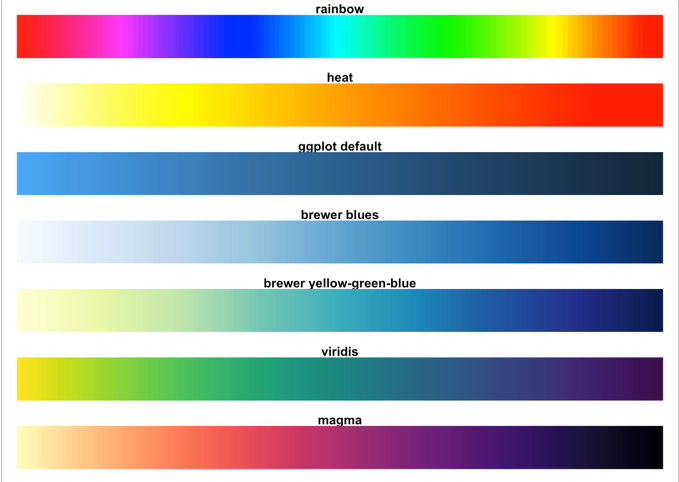

In [23]:
Image(filename=files[11]) 

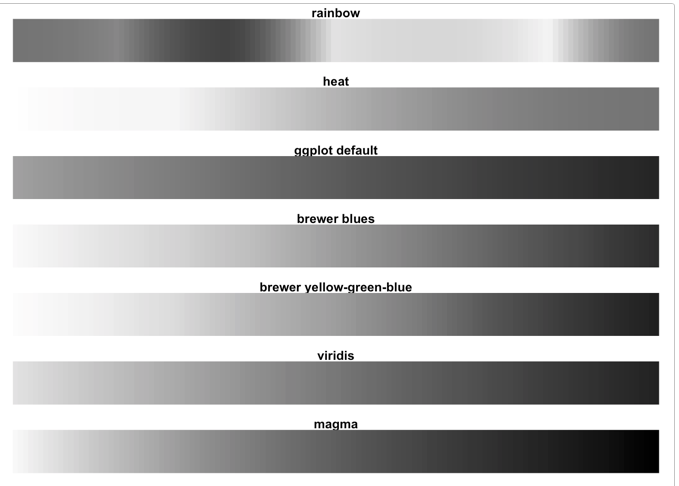

In [24]:
Image(filename=files[10]) 

## Finally (not for today): consider interactive visualization!

Other things I've left out: Visualization for data exploration, and handling high-dimensional datasets